# **Mini Projet N°1 : Les arbres de décision**

### ***Bibs import***

In [3]:
# Importer les bibliothèques
import pandas as pd
import math
import numpy as np
import time as t
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import SimpleImputer,IterativeImputer
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,confusion_matrix,ConfusionMatrixDisplay,accuracy_score, classification_report

from sklearn import metrics
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,LabelEncoder

import warnings
warnings.filterwarnings('ignore')

## ***Méthode 1 : Implémentation à l’aide des librairies***

### **1. Charger et Prétraiter le Dataset**

#### **Read the dataset**

In [4]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/data mining/heart_disease_uci.csv'

Mounted at /content/drive


In [5]:
# Charger le dataset
df = pd.read_csv(file_path)

#### **EDA de notre dataset**

In [6]:
# la dimension de notre dataset
print('le nombre de colonne est : ',df.shape[1])
print('le nombre de ligne est : ',df.shape[0])

le nombre de colonne est :  16
le nombre de ligne est :  920


In [7]:
# Afficher les premières lignes du dataset
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [8]:
# savoir les infos de chaque colonne
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [9]:
#description des colonnes numériques du notre dataset
df=  df.drop(['id'], axis=1)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,920.0,53.510870,9.424685,28.0,47.0,54.0,60.0,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.0,130.0,140.0,200.0
chol,890.0,199.130337,110.780810,0.0,175.0,223.0,268.0,603.0
thalch,865.0,137.545665,25.926276,60.0,120.0,140.0,157.0,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.0,0.5,1.5,6.2
ca,309.0,0.676375,0.935653,0.0,0.0,0.0,1.0,3.0
num,920.0,0.995652,1.142693,0.0,0.0,1.0,2.0,4.0


In [10]:
# les valeurs uniques de chaque variables catégorielles
for i in df.columns :
  if df[i].dtype == 'object' or df[i].dtype == 'category' :
    print("les valeurs unique de ",i," sont : ",df[i].unique())

les valeurs unique de  sex  sont :  ['Male' 'Female']
les valeurs unique de  dataset  sont :  ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
les valeurs unique de  cp  sont :  ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
les valeurs unique de  fbs  sont :  [True False nan]
les valeurs unique de  restecg  sont :  ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
les valeurs unique de  exang  sont :  [False True nan]
les valeurs unique de  slope  sont :  ['downsloping' 'flat' 'upsloping' nan]
les valeurs unique de  thal  sont :  ['fixed defect' 'normal' 'reversable defect' nan]


#### **Data vis**

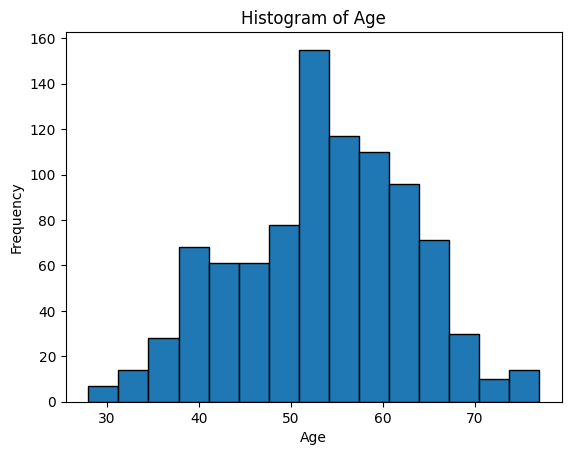

In [11]:
#plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=15, edgecolor='black')  # Adjust 'bins' as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

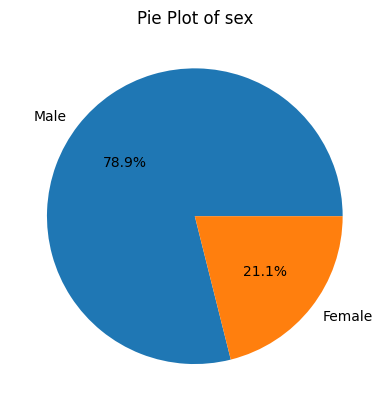

sex
Male      726
Female    194
Name: count, dtype: int64


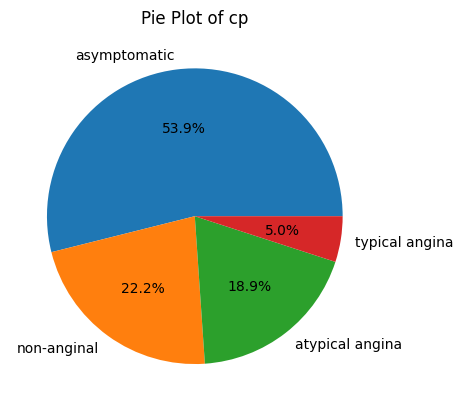

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


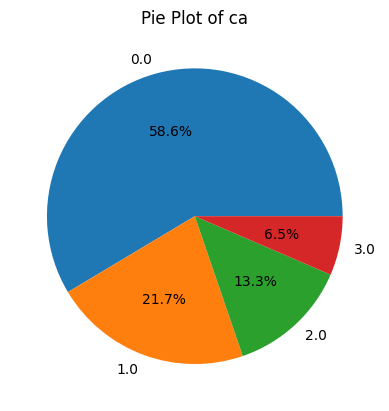

ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64


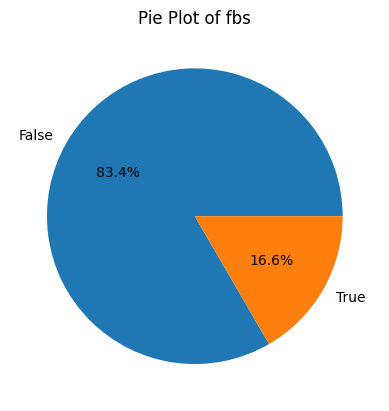

fbs
False    692
True     138
Name: count, dtype: int64


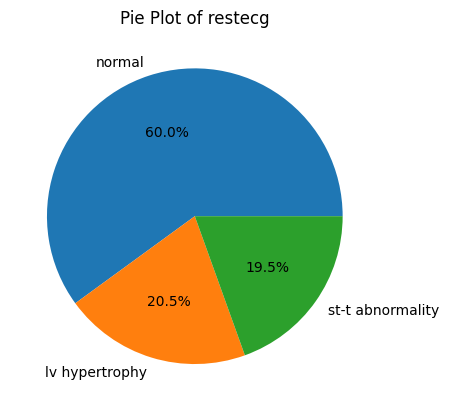

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64


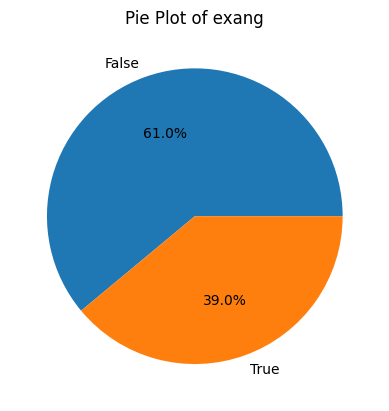

exang
False    528
True     337
Name: count, dtype: int64


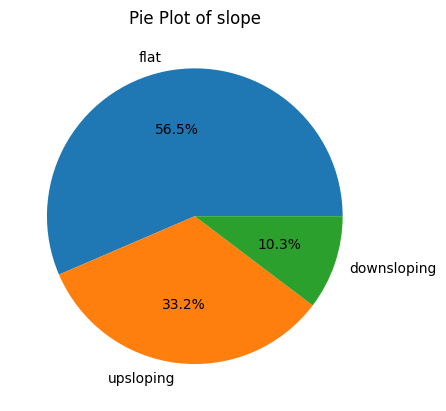

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64


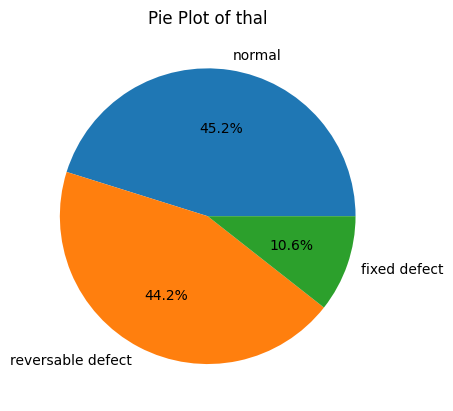

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64


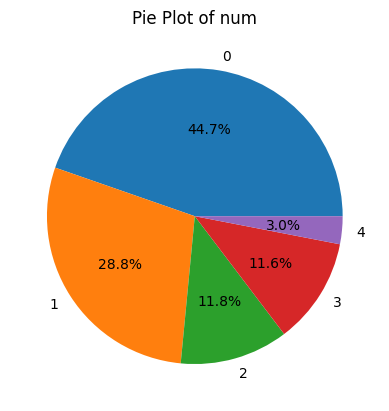

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


In [12]:
columns_to_plot = ['sex', 'cp', 'ca','fbs', 'restecg', 'exang', 'slope', 'thal', 'num']

for column in columns_to_plot:
    df[column].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
    plt.title(f'Pie Plot of {column}')
    plt.ylabel('')  # Remove the y-axis label
    plt.show()
    print(df[column].value_counts())

#### **Gestion des valeurs manquates**

In [13]:
# savoir le nombre de lignes nulles
df.isnull().sum().sort_values(ascending=False).to_frame().T

,ca,thal,slope,fbs,oldpeak,trestbps,thalch,exang,chol,restecg,age,sex,dataset,cp,num
0,611,486,309,90,62,59,55,55,30,2,0,0,0,0,0


In [14]:
# find categorical Columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
# find Numerical Columns
Num_cols = df.select_dtypes(exclude='object').columns.tolist()
print(f'les colonnes catégorielles : {cat_cols}')
print(f'les colonnnes numériques: {Num_cols}')

les colonnes catégorielles : ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
les colonnnes numériques: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [15]:
# FInd columns
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numerical_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [16]:
# This function imputes missing values in categorical columnsdef impute_categorical_missing_data(passed_col):
passed_col = categorical_cols
def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [17]:
def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()


    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [18]:
# impute missing values
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()

for col in missing_data_cols:
    print("Les valeurs manquantes de la colonne \"", col, "\" est :", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
        print("--"*60)
    elif col in numerical_cols:
        df[col] = impute_continuous_missing_data(col)
        print("--"*60)
    else:
        pass

Les valeurs manquantes de la colonne " trestbps " est : 6.41%
MAE = 13.266589595375722 

RMSE = 17.118509875185424 

R2 = 0.0850239789047863 

------------------------------------------------------------------------------------------------------------------------
Les valeurs manquantes de la colonne " chol " est : 3.26%
MAE = 52.452865168539326 

RMSE = 75.7036220060273 

R2 = 0.546004066599224 

------------------------------------------------------------------------------------------------------------------------
Les valeurs manquantes de la colonne " fbs " est : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

------------------------------------------------------------------------------------------------------------------------
Les valeurs manquantes de la colonne " restecg " est : 0.22%
The feature 'restecg' has been imputed with 61.41 accuracy

------------------------------------------------------------------------------------------------------------------------
Les

In [19]:
df.isnull().sum().sort_values(ascending=False).to_frame().T

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
df.duplicated().sum()

2

In [21]:
# drop duplicates
df=df.drop_duplicates()
print(df.duplicated().sum())
print("la dimension de notre dataset après nettoyage est :",df.shape)

0
la dimension de notre dataset après nettoyage est : (918, 15)


#### **Détection des outliers en utilisant l'IQR**

In [22]:
# Détection des outliers en utilisant l'IQR
def detect_outliers(df, numerical_cols):
  for col in numerical_cols:
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
      if outliers.empty:
          print(f'Pas d\'outliers dans la colonne "{col}"')
      else:
        print(f'le nombre d\'Outliers dans la colonne "{col}" est : {outliers.shape[0]} :')
        #print(outliers)
        print('--'*60)
detect_outliers(df, numerical_cols)

le nombre d'Outliers dans la colonne "oldpeak" est : 3 :
------------------------------------------------------------------------------------------------------------------------
le nombre d'Outliers dans la colonne "thalch" est : 2 :
------------------------------------------------------------------------------------------------------------------------
le nombre d'Outliers dans la colonne "chol" est : 184 :
------------------------------------------------------------------------------------------------------------------------
le nombre d'Outliers dans la colonne "trestbps" est : 28 :
------------------------------------------------------------------------------------------------------------------------
Pas d'outliers dans la colonne "age"


#### **Remplacement des outilers avec la mediane**

In [23]:
# Imputation avec la médiane
for col in numerical_cols:
    median = df[col].median()
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])


In [24]:
# Détection des outliers après Imputation
detect_outliers(df, numerical_cols)

Pas d'outliers dans la colonne "oldpeak"
Pas d'outliers dans la colonne "thalch"
le nombre d'Outliers dans la colonne "chol" est : 40 :
------------------------------------------------------------------------------------------------------------------------
Pas d'outliers dans la colonne "trestbps"
Pas d'outliers dans la colonne "age"


#### **Encodage des variables catégorielles**

In [25]:
# Encoder les variables catégorielles
Label_Encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = Label_Encoder.fit_transform(df[col])
    else:
        pass

In [89]:
#data après traitement
print('data après traitement :')
df.sample(5)

data après traitement :


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
330,38.0,0,1,1,120.0,275.0,0,1,129.0,0,0.0,1,0.0,1,0
451,54.0,1,1,1,110.0,208.0,0,1,142.0,0,0.0,2,0.0,0,0
587,49.0,1,1,0,128.0,212.0,0,1,96.0,1,0.0,1,1.0,2,1
282,55.0,0,0,0,128.0,205.0,0,2,130.0,1,2.0,1,1.0,2,3
268,40.0,1,0,0,152.0,223.0,0,1,181.0,0,0.0,2,0.0,2,1


### **2. Construire un Arbre de Décision**

#### **Separate data into train and test and normalise it**

In [27]:
# Séparation des features (X) et de la variable cible (y)
X = df.drop('num', axis=1)
y = df['num']

# Normalisation des features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Division du dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### **DT model build**

In [28]:
# Initialiser un modèle d'arbre de décision avec des hyperparamètres basiques
model = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42,min_samples_split= 30)

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=30, random_state=42)

**Paramètres clés :**

. max_depth : Limite la profondeur de l'arbre pour éviter l'overfitting.

. criterion : Définit la fonction à utiliser pour mesurer la qualité de la division (gini ou entropy).

. min_samples_split : Nombre minimum d'échantillons nécessaires pour diviser un nœud.

### **3. Évaluer le Modèle**


Train Accuracy: 0.6893732970027248
Test Accuracy: 0.592391304347826
------------------------------------------------------------------------------------------------------------------------
Rapport de classification :
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        73
           1       0.52      0.55      0.53        62
           2       0.31      0.23      0.26        22
           3       0.41      0.32      0.36        22
           4       0.00      0.00      0.00         5

    accuracy                           0.59       184
   macro avg       0.40      0.39      0.39       184
weighted avg       0.56      0.59      0.57       184

------------------------------------------------------------------------------------------------------------------------
Matrice de confusion :
[[63  8  1  1  0]
 [18 34  5  5  0]
 [ 2 13  5  2  0]
 [ 0  9  4  7  2]
 [ 0  2  1  2  0]]


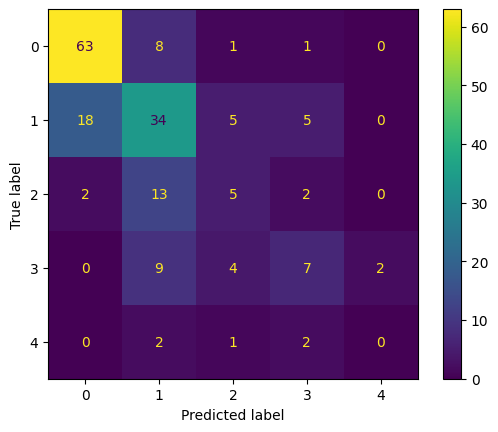

In [29]:
# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Prédire pour l'ensemble d'entraînement et de test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


print("--"*60)

# Rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))
print("--"*60)

# Matrice de confusion
print("Matrice de confusion :")
print(metrics.confusion_matrix(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1, 2, 3,4])

cm_display.plot()
plt.show()

**Choix des métriques :**

. Accuracy : Pourcentage de prédictions correctes.

. Classification Report : Fournit des informations sur la précision, le rappel, et le score F1.

. Confusion Matrix : Permet de voir les faux positifs et faux négatifs.

### **4. Optimiser les Hyperparamètres**

#### **Grid search for best params avec GridSerachCV**

In [30]:
s = t.time()
# Définir les hyperparamètres à tester

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5,10,15, 20,25,30,35,40],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': [None,'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50]
}

# Appliquer GridSearchCV pour trouver la meilleure configuration
"""
StratifiedKFold : Assure que chaque pli contient à peu près la même proportion de chaque classe,
 ce qui est particulièrement utile pour les jeux de données déséquilibrés.
 """
cv = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and accuracy score
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_accuracy = best_model.score(X_test, y_test)

print(f"Best parameters: {best_params}")
print(f"Accuracy for best parameters: {best_accuracy:.4f}")

elapsed_time = t.time()-s
minutes = int(elapsed_time // 60)
seconds = elapsed_time % 60

print(f"le temps ecoulé pour ce calcul est : {minutes} minutes, {seconds:.2f} secondes")

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 8, 'min_samples_split': 2}
Accuracy for best parameters: 0.5815
le temps ecoulé pour ce calcul est : 2 minutes, 58.12 secondes


Training score : 0.6934604904632152
Testing score : 0.5815217391304348
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        73
           1       0.54      0.48      0.51        62
           2       0.38      0.27      0.32        22
           3       0.38      0.23      0.29        22
           4       0.00      0.00      0.00         5

    accuracy                           0.58       184
   macro avg       0.40      0.38      0.38       184
weighted avg       0.54      0.58      0.55       184

Matrice de confusion :
[[66  4  2  1  0]
 [25 30  3  4  0]
 [ 4  7  6  3  2]
 [ 1 11  4  5  1]
 [ 0  4  1  0  0]]


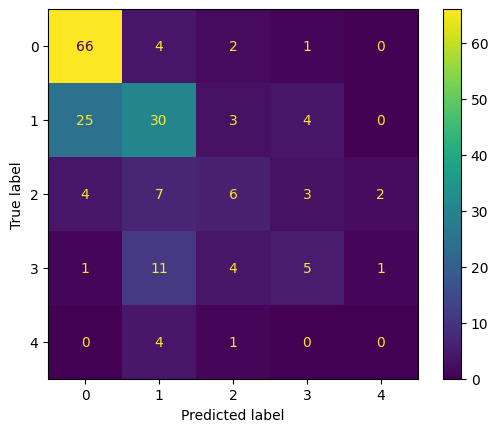

In [31]:
# Entraîner le modèle sur les données avec ces nouveaux params
best_model.fit(X_train, y_train)
# Prédire sur l'ensemble de test
y_pred1 = best_model.predict(X_test)

# Calculer la précision
trs=best_model.score(X_train,y_train)
tss=best_model.score(X_test,y_test)

print("Training score :",trs)
print("Testing score :",tss)

# Rapport de classification
print(classification_report(y_test, y_pred1))

# Matrice de confusion
print("Matrice de confusion :")
print(metrics.confusion_matrix(y_test, y_pred1))
confusion_matrix1 = metrics.confusion_matrix(y_test, y_pred1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix1, display_labels=[0, 1, 2, 3,4])

cm_display.plot()
plt.show()

**Alors les best paramètres sont : criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 30, 'min_samples_leaf': 8, 'min_samples_split': 20**

#### **Choose of the best scaler**

In [32]:
# Choix des scalers
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler()
}

# Tester chaque scaler
for scaler_name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)
    model = DecisionTreeClassifier(**best_params)  # Avec les meilleurs paramètres trouvés
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    print(f"{scaler_name} - Cross-validated accuracy: {scores.mean():.4f}")


MinMaxScaler - Cross-validated accuracy: 0.5118
StandardScaler - Cross-validated accuracy: 0.5130
RobustScaler - Cross-validated accuracy: 0.4781


**Donc le best scaling est : MinMaxScaler()**

### **5. Expliquer les Résultats**


#### **Plot de l'arbre de décision**

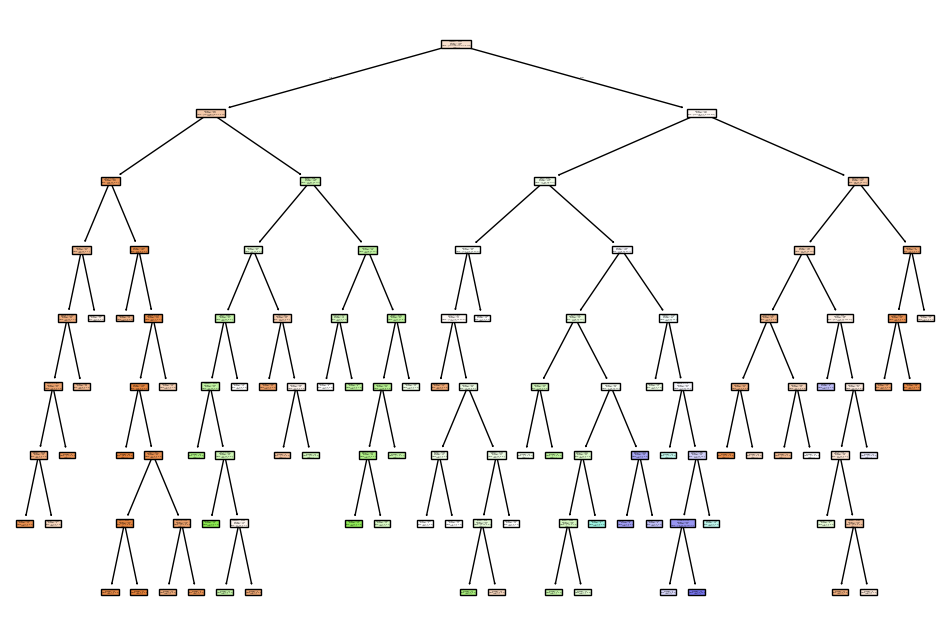

In [90]:
# Visualiser l'arbre de décision
plt.figure(figsize=(12, 8))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['0','1', '2', '3', '4'])
plt.savefig('decision_tree.png')
plt.show()



#### **Les variables importantes**

In [36]:
# Importance des caractéristiques
importances = best_model.feature_importances_
features = X.columns
for feature, importance in zip(features, importances):
    print(f"Feature: {feature}, Importance: {importance}")


Feature: age, Importance: 0.07050245038149247
Feature: sex, Importance: 0.0
Feature: dataset, Importance: 0.11648519134694411
Feature: cp, Importance: 0.06024323006025993
Feature: trestbps, Importance: 0.043827848162745826
Feature: chol, Importance: 0.037982595469831966
Feature: fbs, Importance: 0.0
Feature: restecg, Importance: 0.041922907920309845
Feature: thalch, Importance: 0.0349918445973581
Feature: exang, Importance: 0.030184843318757832
Feature: oldpeak, Importance: 0.027161347442232912
Feature: slope, Importance: 0.08246919850263096
Feature: ca, Importance: 0.23853412143454045
Feature: thal, Importance: 0.2156944213628956


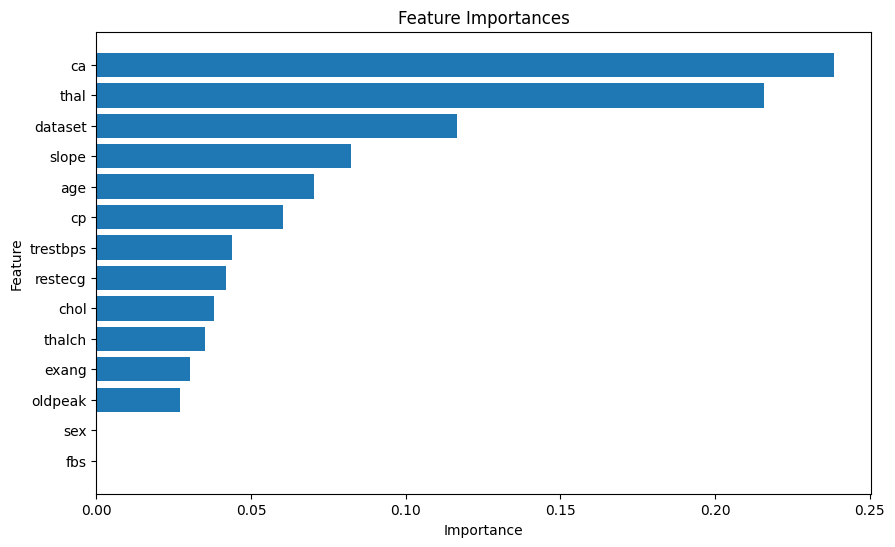

In [37]:
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

#### **Retrain the model with the importants features and the best params**

In [39]:
"""
# Convertir X_train et X_test en DataFrames avec les noms de colonnes appropriés
X_train_df = pd.DataFrame(X_train, columns=['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])
X_test_df = pd.DataFrame(X_test, columns=['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])
"""
# Sélectionner uniquement les caractéristiques importantes
important_features = feature_importances[feature_importances['Importance'] > 0]['Feature'].tolist()
column_indices = [df.columns.get_loc(col) for col in important_features]

# Utilisez les indices pour sélectionner les colonnes dans les tableaux NumPy
X_train_selected = X_train[:, column_indices]
X_test_selected = X_test[:, column_indices]


# Réentraîner le modèle en utilisant les caractéristiques sélectionnées
best_model.fit(X_train_selected, y_train)
#best_params2 = grid_search.best_params_
#best_model2 = grid_search.best_estimator_
best_accuracy2 = best_model.score(X_test_selected, y_test)

#print(f"Best parameters with selected features: {best_params2}")
print(f"Accuracy with selected features: {best_accuracy2:.4f}")


Accuracy with selected features: 0.5489


#### **Grid search for best params avec RandomizedSerachCV**

In [40]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5,10,15, 20,25,30,35,40],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': [None,'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50]
}

In [41]:
# Créer l'objet RandomizedSearchCV
DT_grid = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=parameters, cv=cv, verbose=False)
DT_grid.fit(X_train, y_train)

#best_dt = DT_grid.best_estimator_

# Afficher les meilleurs hyperparamètres
print(f"Best parameters: {DT_grid.best_params_}")

# Créer un nouveau modèle avec des hyperparamètres spécifiques
dt = DecisionTreeClassifier(**DT_grid.best_params_)

# Ajuster ce modèle avec les données d'entraînement
dt.fit(X_train, y_train)

Best parameters: {'min_samples_split': 15, 'min_samples_leaf': 8, 'max_leaf_nodes': 40, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}


DecisionTreeClassifier(max_depth=10, max_features='sqrt', max_leaf_nodes=40,
                       min_samples_leaf=8, min_samples_split=15)

In [42]:
trs=dt.score(X_train,y_train)
tss=dt.score(X_test,y_test)

print("Training score :",trs)
print("Testing score :",tss)

Training score : 0.6975476839237057
Testing score : 0.5706521739130435


##  ***Méthode 2 : Implémentation manuelle***

### **1. Calcul du Gain d'Entropie**


#### **a. Fonction d'Entropie**


In [60]:
def entropy(df):

    label_column = df[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))

    return entropy

#### **b. Fonction de Gain d'Information**


In [61]:
def information_gain(y, x, num_bins=10):
    # Entropie avant la division
    initial_entropy = entropy(y)

    # Calculer les valeurs uniques et leurs indices
    unique_values, counts = np.unique(x, return_counts=True)
    weighted_entropy = 0.0

    # Déterminer si x est discret ou continu
    if len(unique_values) / len(x) >= 0.1:  # Si x est continu
        # Discrétisation de x
        hist, bin_edges = np.histogram(x, bins=num_bins)
        for i in range(len(bin_edges) - 1):
            mask = (x >= bin_edges[i]) & (x < bin_edges[i + 1])
            subset = y[mask]
            weighted_entropy += (np.sum(mask) / len(x)) * entropy(subset) #Calculer l'entropie pondérée

    else:
        # Cas des variables discrètes
        for v, count in zip(unique_values, counts):
            subset = y[x == v]  # Sous-ensemble de y correspondant à la valeur v
            weighted_entropy += (count / len(x)) * entropy(subset) #Calculer l'entropie pondérée

    return initial_entropy - weighted_entropy #Retourner le gain d'information

### **2. Sélection du Meilleur Attribut**


In [62]:
def best_attribute(X, y):
    best_gain = -1
    best_attr = -1

    for i in range(X.shape[1]):  # Pour chaque attribut
        gain = information_gain(y, X[:, i])  # Calculer le gain d'information
        if gain > best_gain:
            best_gain = gain
            best_attr = i
    return best_attr

###**3. Construction Récursive de l'Arbre /4. Arrêt de la Construction**




#### **Helper Functions**

In [63]:
def check_purity(data):

    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False


# 1.2 Create Leaf
def create_leaf(data, ml_task):

    label_column = data[:, -1]
    if ml_task == "regression":
        leaf = np.mean(label_column)

    # classfication
    else:
        unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)
        index = counts_unique_classes.argmax()
        leaf = unique_classes[index]

    return leaf
# 1.3 Determine potential splits
def get_potential_splits(data):

    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1): # excluding the last column which is the label
        values = data[:, column_index]
        unique_values = np.unique(values)

        potential_splits[column_index] = unique_values

    return potential_splits


def calculate_mse(data):
    actual_values = data[:, -1]
    if len(actual_values) == 0:   # empty data
        mse = 0

    else:
        prediction = np.mean(actual_values)
        mse = np.mean((actual_values - prediction) **2)

    return mse
# 3.2 All examples of a dataframe
def make_predictions(df, tree):

    if len(df) != 0:
        predictions = df.apply(predict_example, args=(tree,), axis=1)
    else:
        # "df.apply()"" with empty dataframe returns an empty dataframe,
        # but "predictions" should be a series instead
        predictions = pd.Series()

    return predictions


# 3.3 Accuracy
def calculate_accuracy(df, tree):
    predictions = make_predictions(df, tree)
    predictions_correct = predictions == df.iloc[:, -1]
    accuracy = predictions_correct.mean()

    return accuracy

In [64]:
# 1.5 Split data
def split_data(data, split_column, split_value):

    split_column_values = data[:, split_column]

    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == "continuous":
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values >  split_value]

    # feature is categorical
    else:
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]

    return data_below, data_above
# 2. Decision Tree Algorithm
# 2.1 Helper Function
def determine_type_of_feature(df):

    feature_types = []
    n_unique_values_treshold = 15
    for feature in df.columns:
        if feature != "label":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")

    return feature_types

In [65]:
def calculate_overall_metric(data_below, data_above, metric_function):

    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_metric =  (p_data_below * metric_function(data_below)
                     + p_data_above * metric_function(data_above))

    return overall_metric

def determine_best_split(data, potential_splits, ml_task):

    first_iteration = True
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)

            if ml_task == "regression":
                current_overall_metric = calculate_overall_metric(data_below, data_above, metric_function=calculate_mse)

            # classification
            else:
                current_overall_metric = calculate_overall_metric(data_below, data_above, metric_function=entropy)

            if first_iteration or current_overall_metric <= best_overall_metric:
                first_iteration = False

                best_overall_metric = current_overall_metric
                best_split_column = column_index
                best_split_value = value

    return best_split_column, best_split_value

#### **DT Algotithm**

In [66]:
# 2.2 Algorithm
def decision_tree_algorithm(df, ml_task, counter=0, min_samples=2, max_depth=5):

    # data preparations
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df

    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        leaf = create_leaf(data, ml_task)
        return leaf

    # recursive part
    else:
        counter += 1

        # helper functions
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits, ml_task)
        data_below, data_above = split_data(data, split_column, split_value)

        # check for empty data
        if len(data_below) == 0 or len(data_above) == 0:
            leaf = create_leaf(data, ml_task)
            return leaf

        # determine question
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)

        # feature is categorical
        else:
            question = "{} = {}".format(feature_name, split_value)

        # instantiate sub-tree
        sub_tree = {question: []}

        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, ml_task, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, ml_task, counter, min_samples, max_depth)

        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base case).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)

        return sub_tree

### **5. Prédiction**


#### **Make predictions**

In [67]:
def predict_example(example, tree):

    # tree is just a root node
    if not isinstance(tree, dict):
        return tree

    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if comparison_operator == "<=":
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # feature is categorical
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer

    # recursive part
    else:
        residual_tree = answer
        return predict_example(example, residual_tree)

#### **Exemple d'utilisation**


In [82]:
X_train_df = pd.DataFrame(X_train,columns = df.columns[:df.shape[1]-1])
X_test_df = pd.DataFrame(X_test,columns = df.columns[:df.shape[1]-1])

In [83]:
dtree = decision_tree_algorithm(X_train_df, ml_task="classification", counter=0, min_samples=2, max_depth=5)
ypred_train = make_predictions(X_train_df, dtree)
ypred_test = make_predictions(X_test_df, dtree)

In [84]:
print(f"Accuracy test : {calculate_accuracy(X_test_df, dtree):.2f}")
print(f"Accuracy train : {calculate_accuracy(X_train_df, dtree):.2f}")

Accuracy test : 0.66
Accuracy train : 0.81


In [88]:
print(dtree)

{'sex = 1.0': [{'thalch <= 0.5481481481481483': [{'dataset = 1.0': [{'oldpeak <= 0.44285714285714284': [{'fbs = 1.0': [0.0, 1.0]}, 1.0]}, {'oldpeak <= 0.38571428571428573': [{'age <= 0.346938775510204': [0.5, 1.0]}, 1.0]}]}, {'age <= 0.4285714285714285': [{'oldpeak <= 0.4285714285714286': [0.5, {'age <= 0.36734693877551017': [0.5, 1.0]}]}, {'restecg = 1.0': [{'exang = 1.0': [0.0, 1.0]}, {'thalch <= 0.6592592592592594': [1.0, 0.5]}]}]}]}, {'slope = 1.0': [{'thalch <= 0.488888888888889': [{'oldpeak <= 0.37142857142857144': [0.5, {'thalch <= 0.4000000000000001': [0.5, 1.0]}]}, 0.5]}, {'age <= 0.2857142857142857': [{'trestbps <= 0.5897435897435896': [0.5, 0.0]}, {'exang = 1.0': [{'chol <= 0.5768025078369905': [0.5, 1.0]}, 0.5]}]}]}]}


# **Evaluation des modèles avec et sans libraries**

In [92]:
trs = dt.score(X_train, y_train)
tss = dt.score(X_test, y_test)

accuracy_train_lib = trs
accuracy_test_lib = tss

accuracy_train_no_lib = calculate_accuracy(X_train_df, dtree)
accuracy_test_no_lib = calculate_accuracy(X_test_df, dtree)
# Création d'un DataFrame pour comparer les performances
performance_data = {
    "Approche": ["Avec Bibliothèque", "Sans Bibliothèque"],
    "Accuracy Train": [accuracy_train_lib, accuracy_train_no_lib],
    "Accuracy Test": [accuracy_test_lib, accuracy_test_no_lib]
}

performance_df = pd.DataFrame(performance_data)

# Affichage des performances
performance_df


,Approche,Accuracy Train,Accuracy Test
0,Avec Bibliothèque,0.697548,0.570652
1,Sans Bibliothèque,0.805177,0.663043


# **The END**